<h1>Project - 3: Dengue Cases</h1>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [3]:
lamok = pd.read_csv('dengue.csv')

In [4]:
lamok

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [7]:
lamok.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [9]:
lamok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h3>Channging Data Types</h3>

In [10]:
lamok['Year'] = lamok['Year'].astype('int')
region_order = ['BARMM', 'CAR', 'NCR', 'Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', 'Region IX', 'Region V', 'Region VI', 'Region VII', 'Region VIII', 'Region X', 'Region XI', 'Region XII', 'Region XIII']
lamok['Region'] = pd.Categorical(lamok['Region'], categories=region_order, ordered=True)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
lamok['Month'] = pd.Categorical(lamok['Month'], categories=month_order, ordered=True)
lamok.dtypes


Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h3>Explonatory Data Analysis</h3>

<h2>Dengue Cases Heatmap (2016–2020)</h2>

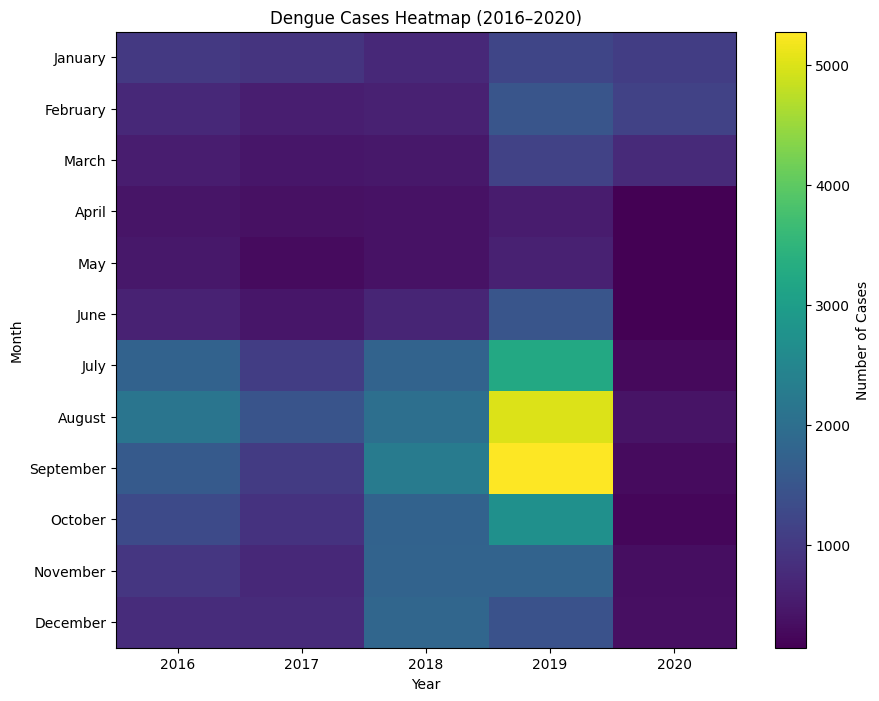

In [12]:
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]
lamok['Month'] = pd.Categorical(
    lamok['Month'],
    categories=month_order,
    ordered=True
)
heatmap_data = lamok.pivot_table(
    values='Dengue_Cases',
    index='Month',
    columns='Year'
)
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect='auto')
plt.title("Dengue Cases Heatmap (2016–2020)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.colorbar(label="Number of Cases")
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.show()

<h3>Insights</h3>

1. The heatmap clearly shows that dengue cases consistently spike during the rainy months, especially from June to September, where the colors intensify. This seasonal pattern reflects how rainfall increases mosquito breeding sites, making the environment more favorable for dengue transmission. The heatmap also highlights 2019 as the year with the most severe intensity, with several months showing significantly higher case counts compared to other years. This confirms that 2019 was the peak year of dengue cases, aligning with reports that the Philippines experienced its worst dengue outbreak in history during that period.

2. The shift from darker shades in 2019 to lighter tones in 2020 suggests a substantial decline in dengue cases. This decline is likely linked to the COVID-19 pandemic, as strict lockdowns, reduced human movement, and improved sanitation habits indirectly limited mosquito exposure and transmission. Another possible factor is underreporting, as many people avoided hospitals due to fear of COVID. Because of these combined effects, the heatmap clearly reflects how the pandemic year disrupted normal dengue trends and led to a reduction in reported cases.

3. Dengue follows a predictable seasonal pattern, peaking in the rainy season. However, 2019 saw a severe outbreak fueled by optimal mosquito conditions and the Dengvaxia controversy, while 2020 cases dropped due to the pandemic. This underscores the need for pre-rainy season preparation and robust public health systems.

<h3>Dengue Cases Trend per Region (2016-2020)</h3>

<Figure size 1200x800 with 0 Axes>

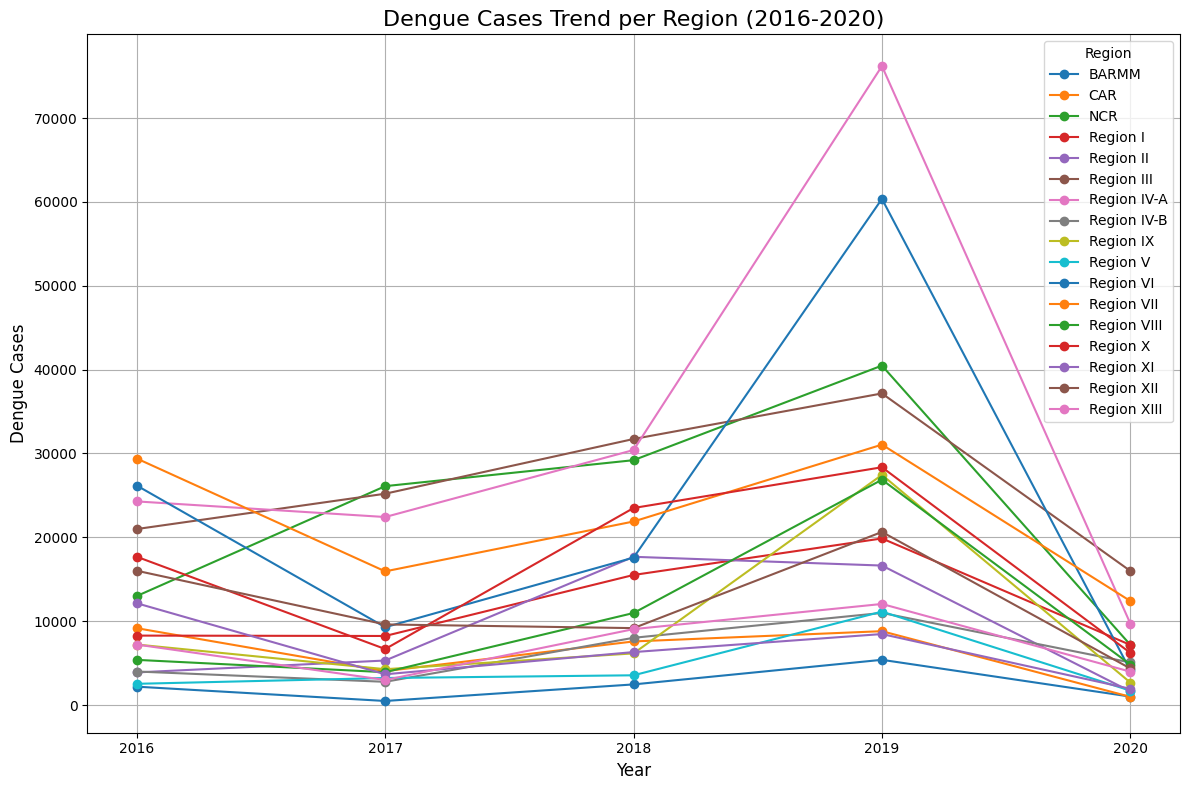

In [16]:
year_region_cases = lamok.groupby(['Year', 'Region'])['Dengue_Cases'].sum().unstack()
plt.figure(figsize=(12, 8))
year_region_cases.plot(kind='line', marker='o', linestyle='-', figsize=(12, 8))

plt.title('Dengue Cases Trend per Region (2016-2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Dengue Cases', fontsize=12)
plt.xticks(range(2016, 2021))
plt.grid(True)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

<h2>Insights</h2>

4. The graph reveals a significant difference in the number of dengue cases across regions. For example, Region IV-A and Region III consistently report high dengue cases throughout the years, especially during peak periods (like mid-year months). In contrast, regions like BARMM and CAR report considerably fewer cases, indicating that dengue transmission rates might vary based on environmental, infrastructural, and healthcare factors across regions.

5. The trend for 2019 shows a sharp increase in dengue cases, especially in regions like Region IV-A and BARMM. This spike may be attributed to the large outbreak that occurred in the Philippines during that year, which was marked as the worst outbreak of dengue in recent history. Public health interventions and factors like the Dengvaxia controversy may have affected the public's readiness and response to the outbreak, contributing to the rise in cases.

6. The 2020 data shows a noticeable decline in dengue cases across most regions. This reduction is likely due to the COVID-19 pandemic, which led to lockdowns, reduced mobility, and stricter sanitation practices, all of which helped decrease the spread of dengue. Additionally, fewer people being outside and more attention on public health measures for COVID-19 might have inadvertently contributed to the lower dengue cases.

<h3>Yearly Trend of Dengue Deaths</h3>

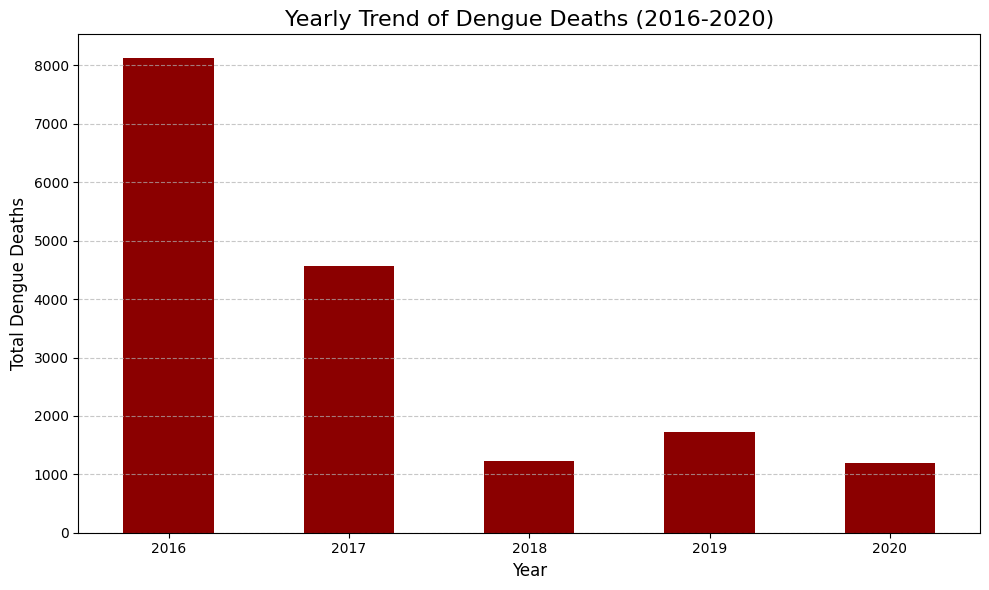

In [20]:
yearly_deaths = lamok.groupby('Year')['Dengue_Deaths'].sum()

plt.figure(figsize=(10, 6))
yearly_deaths.plot(kind='bar', color='darkred')
plt.title('Yearly Trend of Dengue Deaths (2016-2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Dengue Deaths', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h2>Insights</h2>

7. The year 2016 recorded the highest number of dengue deaths, reflecting one of the country's worst outbreaks. This high mortality suggests health systems were overwhelmed, potentially due to aggressive virus strains, ideal mosquito breeding conditions, or insufficient containment measures.

8. Dengue related deaths saw a sustained decline after 2016, reflecting the positive impact of strengthened public health efforts. Improved vector control, diagnostics, and treatment likely contributed to this success.

9. National trends hint at underlying regional inequalities. To further reduce dengue deaths, we need regional data to identify and support vulnerable areas with poor healthcare access or mosquito control, especially during peak seasons.

<h3>PREDICTION USING LINEAR REGRESSION</h3>

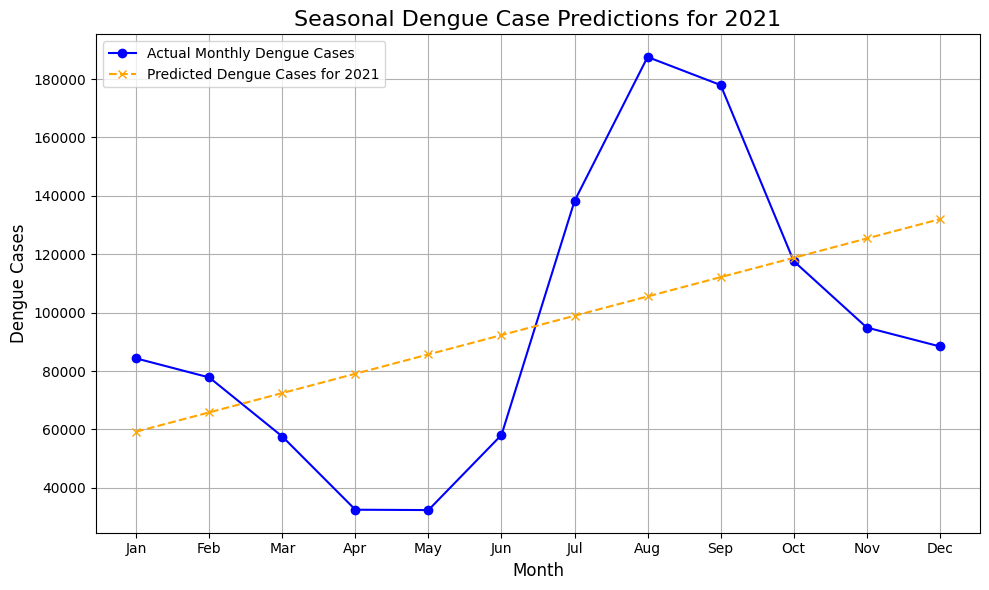

In [28]:
monthly_cases = lamok.groupby('Month')['Dengue_Cases'].sum()
monthly_cases_numbers = monthly_cases.index.map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
})
X = monthly_cases_numbers.values.reshape(-1, 1) 
y = monthly_cases.values  
model = LinearRegression()
model.fit(X, y)
predicted_cases_2021 = model.predict(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]).reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(monthly_cases_numbers, monthly_cases, label='Actual Monthly Dengue Cases', color='blue', marker='o')
plt.plot(range(1, 13), predicted_cases_2021, label='Predicted Dengue Cases for 2021', color='orange', linestyle='--', marker='x')

plt.title('Seasonal Dengue Case Predictions for 2021', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Dengue Cases', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h2>Insights</h2>

1. dengue cases show a sharp increase in June and July. This suggests a possible outbreak during the wet season, when mosquito breeding conditions are ideal due to rain. Public health authorities should prepare for potential high case loads during this period, especially by ramping up prevention and awareness efforts.

2. While the actual dengue cases (shown in blue) fluctuate significantly across months, the predicted cases (shown in orange) follow a relatively linear upward trend. This highlights a limitation of using Linear Regression for seasonal diseases like dengue. Seasonal peaks and outbreaks due to environmental factors are not well-captured by a simple regression model, and more advanced models would better account for the seasonality.